# Utils

In [1]:
import os
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
import tensorflow.keras as keras
import json
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import random
random_seed = random.seed(0)
from sklearn.model_selection import train_test_split, KFold
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
import json
from scipy.ndimage import gaussian_filter1d
import seaborn as sns

def evaluate_trained_model(trained_model_path, history_path, data_directory):
    #load data
    file_list = os.listdir(data_directory)
    X_train = pd.read_csv(os.path.join(data_directory, file_list[0]))
    X_train.pop("Unnamed: 0")
    X_valid = pd.read_csv(os.path.join(data_directory, file_list[1]))
    X_valid.pop("Unnamed: 0")
    y_train = np.loadtxt(os.path.join(data_directory, file_list[2]), delimiter=",")
    y_valid = np.loadtxt(os.path.join(data_directory, file_list[3]), delimiter=",")
    standard_scaler = StandardScaler()
    X_train_scaled = standard_scaler.fit_transform(X_train)
    X_valid_scaled = standard_scaler.transform(X_valid)
    
    # load trained model and corresponding history
    model = keras.models.load_model(trained_model_path)
    history = json.load(open(history_path))
    
    
    #plot history
    plt.plot(history['loss'], label='train')#, ax=axs[0])
    plt.plot(history['val_loss'], label='val')#, ax = axs[0])
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend(loc='lower right')
    plt.show()
    print("MODEL PATH: ", trained_model_path)
    
    #plot mse on training set
    plt.plot(y_train, my_model.predict(X_train_scaled)[:, 0], "x", ax=axs[1])
    plt.xlabel("True")
    plt.ylabel("Predicted")
    
    # get predicted values and compute mse score
    y_pred = model.predict(X_valid_scaled)
    performance_measurement = mse(y_pred, y_valid)
    print("VALID MAE: ", performance_measurement)
    return performance_measurement, trained_model_path

def get_performance_on_valid_set_for_model(trained_model_path, data_directory):
    # load datasets, prepare for scaling and scale data
    file_list = os.listdir(data_directory)
    X_train = pd.read_csv(os.path.join(data_directory, file_list[0]))
    X_train.pop("Unnamed: 0")
    X_valid = pd.read_csv(os.path.join(data_directory, file_list[1]))
    X_valid.pop("Unnamed: 0")
    #y_train = np.loadtxt(os.path.join(data_directory, file_list[2]), delimiter=",")
    y_valid = np.loadtxt(os.path.join(data_directory, file_list[3]), delimiter=",")
    standard_scaler = StandardScaler()
    X_train_scaled = standard_scaler.fit_transform(X_train)
    X_valid_scaled = standard_scaler.transform(X_valid)
    
    # get predicted values and compute mse score
    model = keras.models.load_model(trained_model_path)
    y_pred = model.predict(X_valid_scaled)
    performance_measurement = mse(y_pred, y_valid)
    print("MODEL PATH: ", trained_model_path)
    print("PERFORMANCE MEASUREMENT: ", performance_measurement)
    
    #return performance and path for comparison between different models
    return performance_measurement, trained_model_path

def get_performance_on_valid_set_for_model_cnn(trained_model_path, data_directory):
        # load datasets, prepare for scaling and scale data
    file_list = os.listdir(data_directory)
    X_train = pd.read_csv(os.path.join(data_directory, file_list[0]))
    X_train.pop("Unnamed: 0")
    X_valid = pd.read_csv(os.path.join(data_directory, file_list[1]))
    X_valid.pop("Unnamed: 0")
    #y_train = np.loadtxt(os.path.join(data_directory, file_list[2]), delimiter=",")
    y_valid = np.loadtxt(os.path.join(data_directory, file_list[3]), delimiter=",")
    standard_scaler = StandardScaler()
    X_train_scaled = standard_scaler.fit_transform(X_train)
    X_valid_scaled = standard_scaler.transform(X_valid)
    X_train_reshaped = np.array(X_train_scaled).reshape(X_train_scaled.shape[0],32,1) 
    X_valid_reshaped = np.array(X_valid_scaled).reshape(X_valid_scaled.shape[0],32,1)
    # get predicted values and compute mse score
    model = keras.models.load_model(trained_model_path)
    y_pred = model.predict(X_valid_reshaped)
    performance_measurement = mse(y_pred, y_valid)
    print("MODEL PATH: ", trained_model_path)
    print("PERFORMANCE MEASUREMENT: ", performance_measurement)
    return performance_measurement, trained_model_path
    
def get_best_model_performance(model_performance_list, model_path_list):
    # get model with lowest computed error 
    min_mse = min(model_performance_list)
    max_mse = max(model_performance_list)
    index = model_performance_list.index(min_mse)
    model_path = model_path_list[index]
    index_2 = model_performance_list.index(max_mse)
    model_path_2 = model_path_list[index_2]
    print("BEST MSE: ", min_mse)
    print("MODEL PATH : ", model_path)
    print("WORST MSE: ", max_mse)
    print("WORST MODEL PATH: ", model_path_2)
    return index


#model_performance_list = []
#model_path_list = []
#for i in range(60): # #number of models, different for each topology 
#    for j in range(5):
#        trained_model_path_flexible = r"\models\trained\{index}trained_on_ds_{index_2}bs32.h5".format(index=str(i), index_2=str(j))
#        history_path_flexible = r"\models\histories\{index}trained_on_ds_{index}bs32.json".format(index=str(i))
#        data_path_flexible = r"\data_final\data_splits\{index}".format(index=str(j))
#        performance, trained_model_path = evaluate_trained_model(trained_model_path_flexible, history_path_flexible, data_path_flexible)
#        model_performance_list.append(performance)
#        model_path_list.append(trained_model_path)#
#
#get_best_model_performance(model_performance_list, model_path_list)

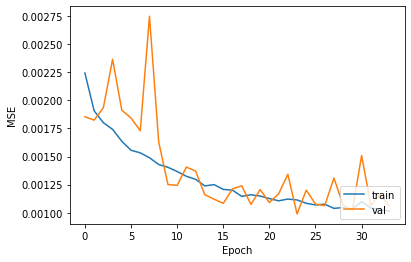

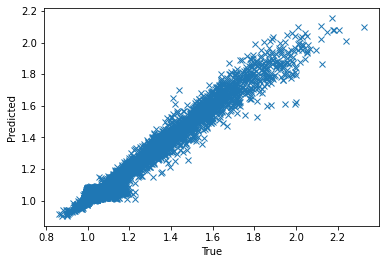

Model: "sequential_437"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3213 (Dense)           (None, 32)                1056      
_________________________________________________________________
dense_3214 (Dense)           (None, 128)               4224      
_________________________________________________________________
dense_3215 (Dense)           (None, 64)                8256      
_________________________________________________________________
dense_3216 (Dense)           (None, 32)                2080      
_________________________________________________________________
dense_3217 (Dense)           (None, 16)                528       
_________________________________________________________________
dense_3218 (Dense)           (None, 8)                 136       
_________________________________________________________________
dense_3219 (Dense)           (None, 4)              

In [85]:
trained_model_path = r"\models_mlp_v3_right_data\trained\{index}trained_on_ds_0bs32.h5".format(index=str(index))
history_path = r"\models_mlp_v3_right_data\histories\{index}trained_on_ds_0bs32.json".format(index=str(index))
data_directory = r"\data_set_splits_right\0"


def plot_learning_curve_and_valid_scores(model_path, history_path, data_path):
    
    history = json.load(open(history_path))
    plt.plot(history['loss'][1:], label='train')#, ax=axs[0])
    plt.plot(history['val_loss'][1:], label='val')#, ax = axs[0])
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend(loc='lower right')
    plt.show()
    
    file_list = os.listdir(data_directory)
    X_train = pd.read_csv(os.path.join(data_directory, file_list[0]))
    X_train.pop("Unnamed: 0")
    X_valid = pd.read_csv(os.path.join(data_directory, file_list[1]))
    X_valid.pop("Unnamed: 0")
    #y_train = np.loadtxt(os.path.join(data_directory, file_list[2]), delimiter=",")
    y_valid = np.loadtxt(os.path.join(data_directory, file_list[3]), delimiter=",")
    standard_scaler = StandardScaler()
    X_train_scaled = standard_scaler.fit_transform(X_train)
    X_valid_scaled = standard_scaler.transform(X_valid)
    
    model = keras.models.load_model(trained_model_path)
    y_pred = model.predict(X_valid_scaled)
    
    plt.plot(y_valid, model.predict(X_valid_scaled), "x")
    plt.xlabel("True")
    plt.ylabel("Predicted")
    plt.show()
    print(model.summary())
    print(model_path)

#plot_learning_curve_and_valid_scores(trained_model_path, history_path, data_directory)

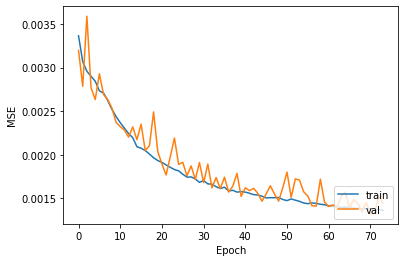

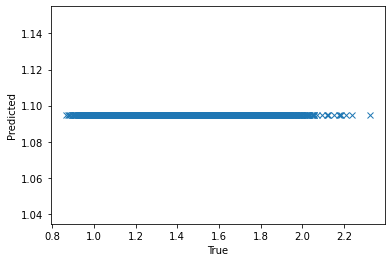

Model: "sequential_349"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2554 (Dense)           (None, 32)                1056      
_________________________________________________________________
dense_2555 (Dense)           (None, 8)                 264       
_________________________________________________________________
dropout_1401 (Dropout)       (None, 8)                 0         
_________________________________________________________________
dense_2556 (Dense)           (None, 6)                 54        
_________________________________________________________________
dropout_1402 (Dropout)       (None, 6)                 0         
_________________________________________________________________
dense_2557 (Dense)           (None, 4)                 28        
_________________________________________________________________
dropout_1403 (Dropout)       (None, 4)              

In [43]:
model_path = r"\models_cnn_v1_right_data\trained\7trained_on_ds_0bs32.h5"
history_path = r"\models_mlp_v3_right_data\histories\7trained_on_ds_0bs32.json"
data_path = r"\data_set_splits_right\0"


def plot_learning_curve_and_valid_scores(model_path, history_path, data_path):
    
    history = json.load(open(history_path))
    plt.plot(history['loss'][1:], label='train')#, ax=axs[0])
    plt.plot(history['val_loss'][1:], label='val')#, ax = axs[0])
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend(loc='lower right')
    plt.show()
    
    file_list = os.listdir(data_directory)
    X_train = pd.read_csv(os.path.join(data_directory, file_list[0]))
    X_train.pop("Unnamed: 0")
    X_valid = pd.read_csv(os.path.join(data_directory, file_list[1]))
    X_valid.pop("Unnamed: 0")
    #y_train = np.loadtxt(os.path.join(data_directory, file_list[2]), delimiter=",")
    y_valid = np.loadtxt(os.path.join(data_directory, file_list[3]), delimiter=",")
    standard_scaler = StandardScaler()
    X_train_scaled = standard_scaler.fit_transform(X_train)
    X_valid_scaled = standard_scaler.transform(X_valid)
    
    model = keras.models.load_model(trained_model_path)
    y_pred = model.predict(X_valid_scaled)
    
    plt.plot(y_valid, model.predict(X_valid_scaled), "x")
    plt.xlabel("True")
    plt.ylabel("Predicted")
    plt.show()
    print(model.summary())
    print(model_path)

#plot_learning_curve_and_valid_scores(model_path, history_path, data_path)

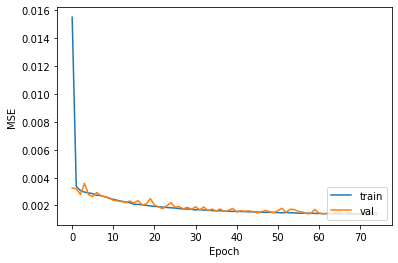

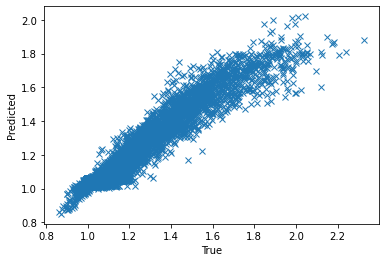

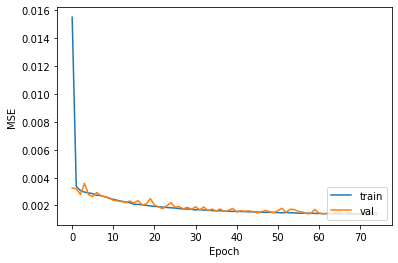

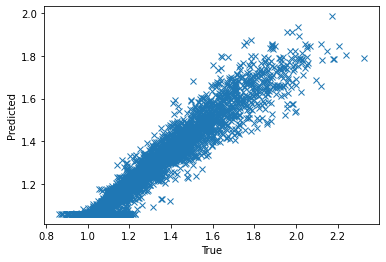

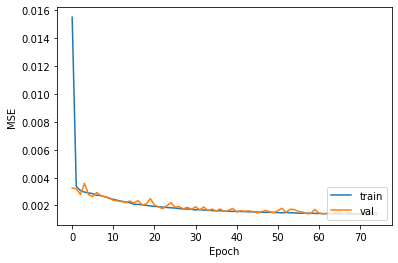

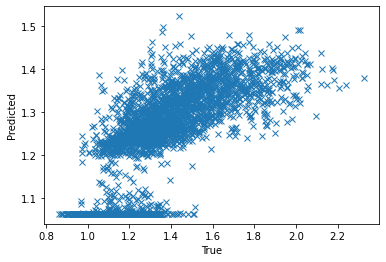

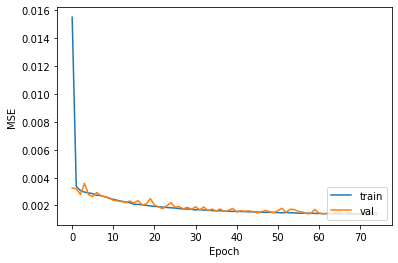

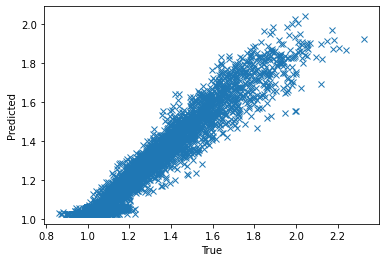

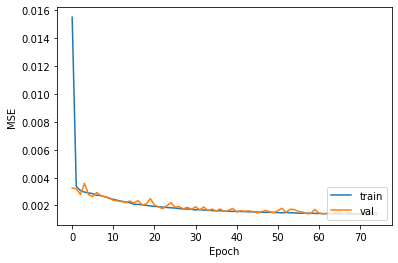

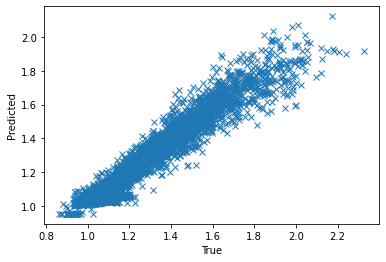

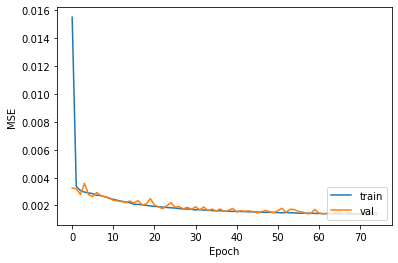

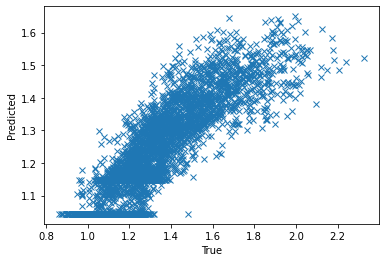

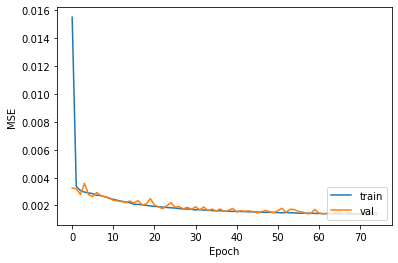

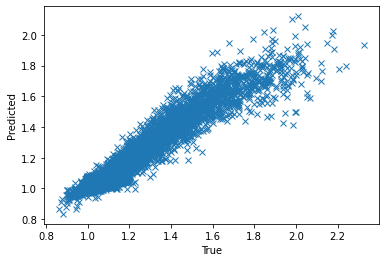

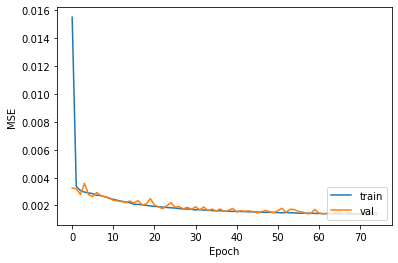

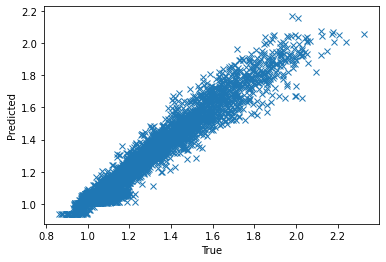

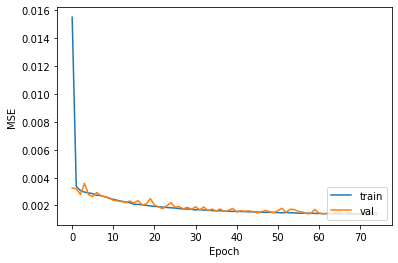

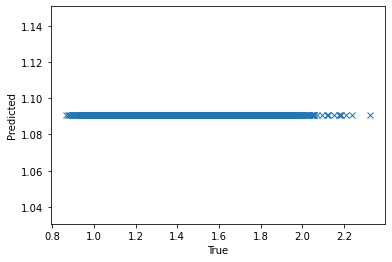

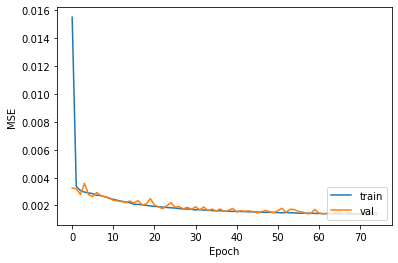

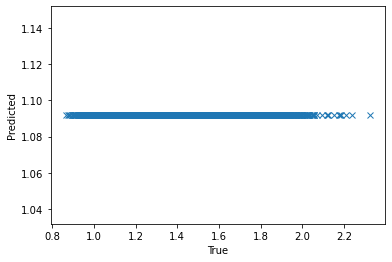

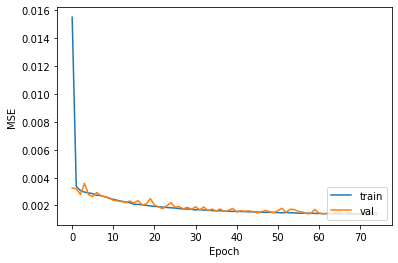

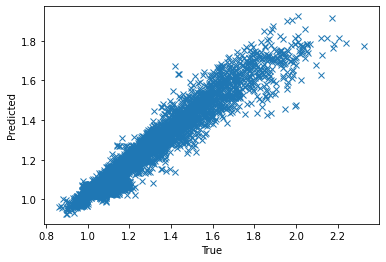

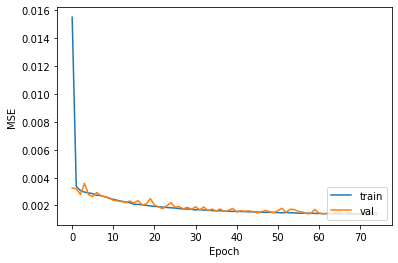

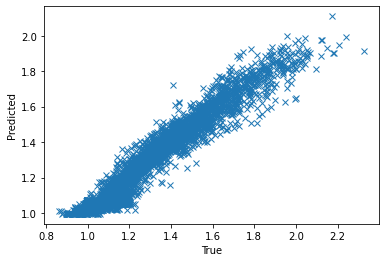

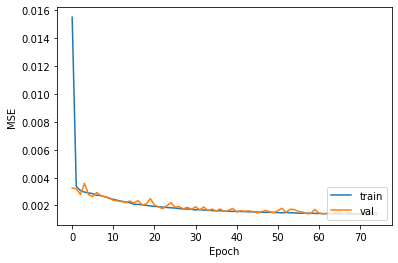

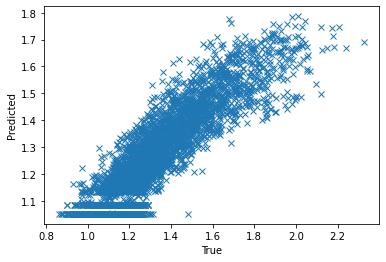

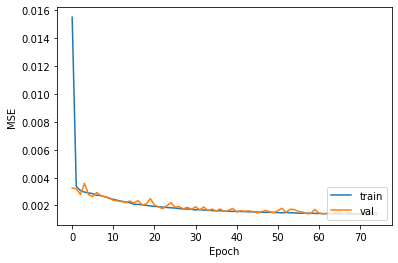

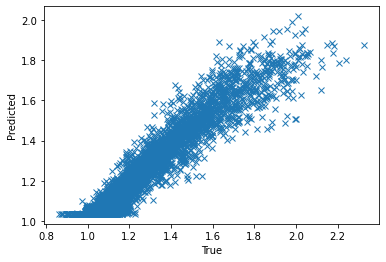

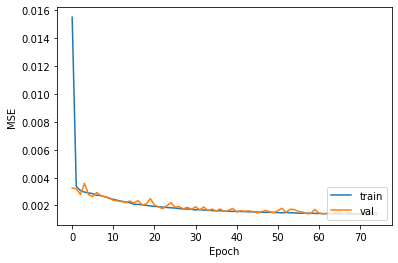

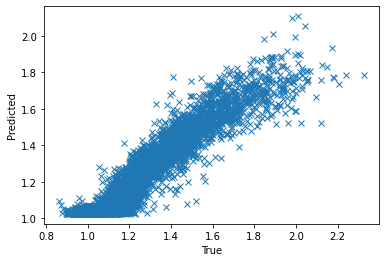

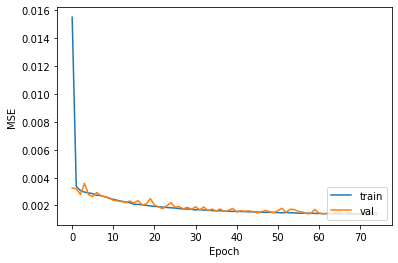

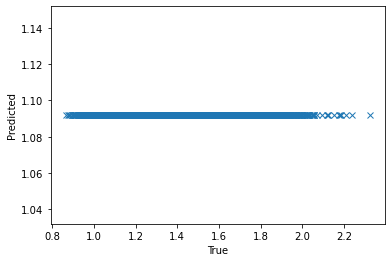

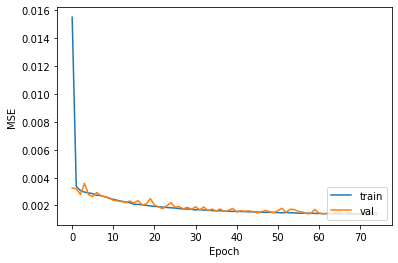

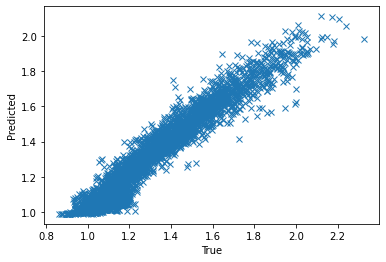

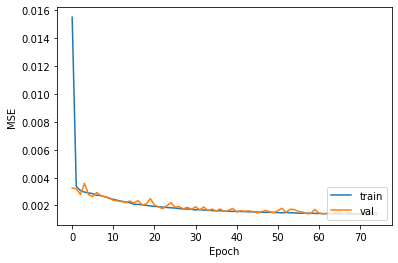

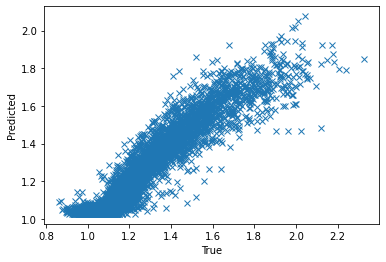

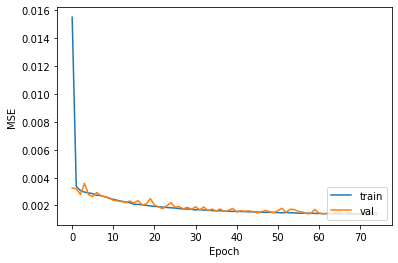

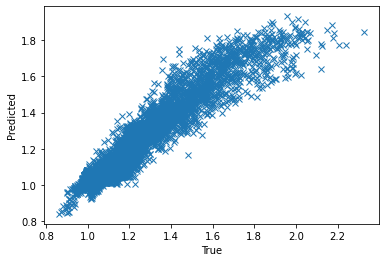

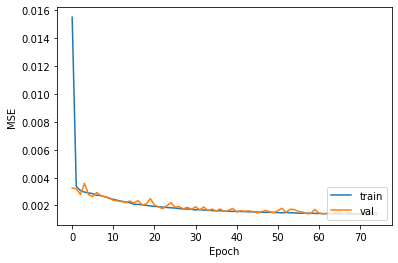

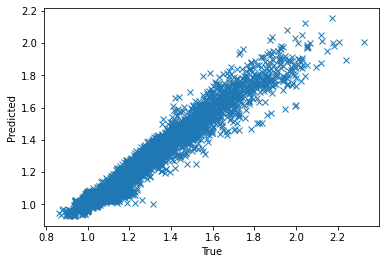

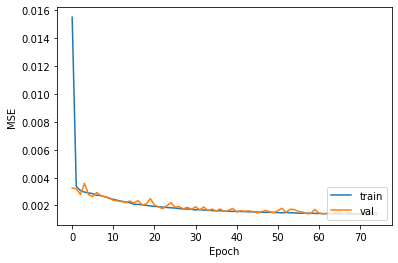

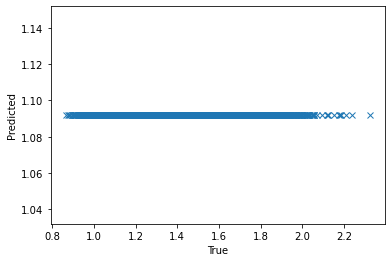

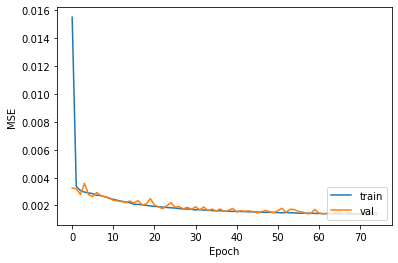

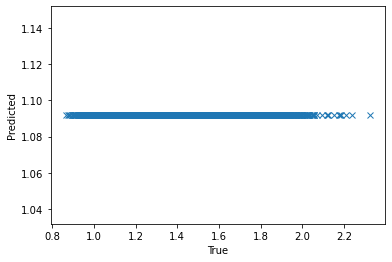

In [47]:
trained_model_root_path = r"\models_cnn_v1_right_data\trained"
histories_path = r"\models_mlp_v3_right_data\histories\{index}trained_on_ds_0bs32.json".format(index=str(i))
data_dir_path = r"\data_set_splits_right\0"
def eval_all_models(trained_model_root_path, data_dir_path):
    model_path_list = []
    file_list = os.listdir(data_directory)
    X_train = pd.read_csv(os.path.join(data_directory, file_list[0]))
    X_train.pop("Unnamed: 0")
    X_valid = pd.read_csv(os.path.join(data_directory, file_list[1]))
    X_valid.pop("Unnamed: 0")
    y_train = np.loadtxt(os.path.join(data_directory, file_list[2]), delimiter=",")
    y_valid = np.loadtxt(os.path.join(data_directory, file_list[3]), delimiter=",")
    X_train = X_train.to_numpy()
    X_valid = X_valid.to_numpy()
    standard_scaler = StandardScaler()
    X_train_scaled = standard_scaler.fit_transform(X_train)
    X_valid_scaled = standard_scaler.transform(X_valid)
    X_train_reshaped = np.array(X_train_scaled).reshape(X_train_scaled.shape[0],32,1) 
    X_valid_reshaped = np.array(X_valid_scaled).reshape(X_valid_scaled.shape[0],32,1)
    for root, dirs, files in os.walk(trained_model_root_path):
        for f in files:
            model_path_list.append(os.path.join(root, f))
    for i in range(len(model_path_list)):
        histories_path = r"\models_mlp_v3_right_data\histories\{index}trained_on_ds_0bs32.json".format(index=str(i))
        model = tf.keras.models.load_model(model_path_list[i])
        history = json.load(open(history_path))
        plt.plot(history['loss'], label='train')#, ax=axs[0])
        plt.plot(history['val_loss'], label='val')#, ax = axs[0])
        plt.xlabel('Epoch')
        plt.ylabel('MSE')
        plt.legend(loc='lower right')
        plt.show()
        plt.plot(y_valid, model.predict(X_valid_reshaped), "x")
        plt.xlabel("True")
        plt.ylabel("Predicted")
        plt.show()
#eval_all_models(trained_model_root_path, data_dir_path)
                            

 # Evaluation

In [ ]:

data_directory = r"\data_final\data_splits\{}"

trained_mlp_model_path = r"\trained_mlp_models\{model_id}trained_on_ds_{data_split}bs32.h5"
untrained_mlp_model_path = r"\untrained_mlp_models"

model_performance_on_all_splits = []
for j in range(len(os.listdir(untrained_mlp_model_path))):
    performance_object = {}
    performance_object["model"] = str(j)
    performance_object["mean_error"] = 0
    for i in range(5):
        trained_mlp_model_path.format(model_id = str(j), data_split = str(i))
        data_directory.format(str(i))
        performance_measurement = get_performance_on_valid_set_for_model(trained_mlp_model_path.format(
            model_id = str(j), data_split = str(i)), data_directory.format(str(i)))
        performance_object["performance_on_ds{}".format(str(i))] = performance_measurement
        print(performance_measurement)
        performance_object["mean_error"] += performance_measurement[0]
    performance_object["mean_error"] = performance_object["mean_error"] / 5
    model_performance_on_all_splits.append(performance_object)  
model_with_min_error = min(model_performance_on_all_splits, key = lambda x:x["mean_error"])
model_with_max_error = max(model_performance_on_all_splits, key = lambda x:x["mean_error"])
print("Best Model: ", model_with_min_error)
print("Worst Model: ", model_with_max_error)

In [ ]:
data_directory = r"\data_final\data_splits\{}"

trained_mlp_model_path = r"\trained_cnn_models\{model_id}trained_on_ds_{data_split}bs32.h5"
untrained_mlp_model_path = r"\untrained_cnn_models"

model_performance_on_all_splits = []
for j in range(len(os.listdir(untrained_mlp_model_path))):
    performance_object = {}
    performance_object["model"] = str(j)
    performance_object["mean_error"] = 0
    for i in range(5):
        trained_mlp_model_path.format(model_id = str(j), data_split = str(i))
        data_directory.format(str(i))
        performance_measurement = get_performance_on_valid_set_for_model_cnn(trained_mlp_model_path.format(
            model_id = str(j), data_split = str(i)), data_directory.format(str(i)))
        performance_object["performance_on_ds{}".format(str(i))] = performance_measurement
        print("HERE", performance_measurement)
        performance_object["mean_error"] += performance_measurement[0]
    performance_object["mean_error"] = performance_object["mean_error"] / 5
    model_performance_on_all_splits.append(performance_object)  
model_with_min_error = min(model_performance_on_all_splits, key = lambda x:x["mean_error"])
model_with_max_error = max(model_performance_on_all_splits, key = lambda x:x["mean_error"])
print("Best Model: ", model_with_min_error)
print("Worst Model: ", model_with_max_error)

In [6]:
def get_performance_on_valid_set_for_model(trained_model_path, data_directory):
    file_list = os.listdir(data_directory)
    X_train = pd.read_csv(os.path.join(data_directory, file_list[0]))
    X_train.pop("Unnamed: 0")
    X_valid = pd.read_csv(os.path.join(data_directory, file_list[1]))
    X_valid.pop("Unnamed: 0")
    #y_train = np.loadtxt(os.path.join(data_directory, file_list[2]), delimiter=",")
    y_valid = np.loadtxt(os.path.join(data_directory, file_list[3]), delimiter=",")
    standard_scaler = StandardScaler()
    X_train_scaled = standard_scaler.fit_transform(X_train)
    X_valid_scaled = standard_scaler.transform(X_valid)
    
    model = keras.models.load_model(trained_model_path)
    y_pred = model.predict(X_valid_scaled)
    performance_measurement = mse(y_pred, y_valid)
    print("MODEL PATH: ", trained_model_path)
    print("PERFORMANCE MEASUREMENT: ", performance_measurement)
    return performance_measurement
    

def get_best_model_performance(model_performance_list, model_path_list):
    min_mse = min(model_performance_list)
    index = model_performance_list.index(min_mse)
    model_path = model_path_list[index]
    print("BEST MSE: ", min_mse)
    print("MODEL PATH : ", model_path)
    return index

def evaluate_trained_model(trained_model_path, history_path, data_directory):
    #ToDo Calculate Performance Measure for Model
    file_list = os.listdir(data_directory)
    X_train = pd.read_csv(os.path.join(data_directory, file_list[0]))
    X_train.pop("Unnamed: 0")
    X_valid = pd.read_csv(os.path.join(data_directory, file_list[1]))
    X_valid.pop("Unnamed: 0")
    #y_train = np.loadtxt(os.path.join(data_directory, file_list[2]), delimiter=",")
    y_valid = np.loadtxt(os.path.join(data_directory, file_list[3]), delimiter=",")
    standard_scaler = StandardScaler()
    X_train_scaled = standard_scaler.fit_transform(X_train) 
    X_valid_scaled = standard_scaler.transform(X_valid)
    #X_train_reshaped = np.array(X_train_scaled).reshape(X_train_scaled.shape[0],32,1) # for cnn usage
    #X_test_reshaped = np.array(X_test_scaled).reshape(X_test_scaled.shape[0],32,1)
    model = keras.models.load_model(trained_model_path)
    #history = json.load(open(history_path))
    
    #fig, axis = plt.subplot(1,2)
    #plot history
    #plt.plot(history.history['loss'], label='train', ax=axs[0])
    #plt.plot(history.history['val_loss'], label='val', ax = axs[0])
    #plt.xlabel('Epoch')
    #plt.ylabel('MSE')
    #plt.legend(loc='lower right')
    
    #plot mse on training set
    #plt.plot(y_train, my_model.predict(X_train_scaled)[:, 0], "x", ax=axs[1])
    #plt.xlabel("True")
    #plt.ylabel("Predicted")
    
    y_pred = model.predict(X_valid_scaled)
    performance_measurement = mse(y_pred, y_valid)
    print("VALID MAE: ", performance_measurement)
    return performance_measurement, trained_model_path

In [25]:
#y_valid, model.predict(X_valid_scaled)
model_path = r"\trained_mlp_models\7trained_on_ds_0bs32.h5"
X_train = pd.read_csv(r"\data_final\data_splits\0\X_train.csv")
X_train.pop("Unnamed: 0")
X_valid = pd.read_csv(r"\data_final\data_splits\0\X_valid.csv")
X_valid.pop("Unnamed: 0")
y_train = np.loadtxt(os.path.join(r"\data_final\data_splits\0\y_train.csv"), delimiter=",")
y_valid = np.loadtxt(os.path.join(r"\data_final\data_splits\0\y_valid.csv"), delimiter=",")
standard_scaler = StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train)
X_valid_scaled = standard_scaler.transform(X_valid)
model = keras.models.load_model(model_path)

fehler_rel = (y_valid - model.predict(X_valid_scaled))/y_valid
fehler_rel = np.nan_to_num(fehler_rel)
plt.hist(fehler_rel, bins = 20)
plt.show()

In [ ]:
def get_performance_on_valid_set_for_model(trained_model_path, data_directory):
    file_list = os.listdir(data_directory)
    X_train = pd.read_csv(os.path.join(data_directory, file_list[0]))
    X_train.pop("Unnamed: 0")
    X_valid = pd.read_csv(os.path.join(data_directory, file_list[1]))
    X_valid.pop("Unnamed: 0")
    #y_train = np.loadtxt(os.path.join(data_directory, file_list[2]), delimiter=",")
    y_valid = np.loadtxt(os.path.join(data_directory, file_list[3]), delimiter=",")
    standard_scaler = StandardScaler()
    X_train_scaled = standard_scaler.fit_transform(X_train)
    X_valid_scaled = standard_scaler.transform(X_valid)
    X_train_reshaped = np.array(X_train_scaled).reshape(X_train_scaled.shape[0],32,1) #for cnn
    X_valid_reshaped = np.array(X_valid_scaled).reshape(X_valid_scaled.shape[0],32,1)
    
    model = keras.models.load_model(trained_model_path)
    y_pred = model.predict(X_valid_reshaped)
    performance_measurement = mse(y_pred, y_valid)
    #plt.plot(y_valid, model.predict(X_valid_reshaped), "x")
    #plt.xlabel("True")
    #plt.ylabel("Predicted")
    #plt.show()
    print("MODEL PATH: ", trained_model_path)
    print("PERFORMANCE MEASUREMENT: ", performance_measurement)
    return performance_measurement
    

def get_best_model_performance(model_performance_list, model_path_list):
    min_mse = min(model_performance_list)
    index = model_performance_list.index(min_mse)
    model_path = model_path_list[index]
    print("BEST MSE: ", min_mse)
    print("MODEL PATH : ", model_path)
    return index



data_directory = r"\data_final\data_splits\{}"

#trained_mlp_model_path = r"\trained_mlp_models\{model_id}trained_on_ds_{data_split}bs32.h5"
#untrained_mlp_model_path = r"\untrained_mlp_models"

trained_cnn_model_path = r"\trained_cnn_models\{model_id}trained_on_ds_{data_split}bs32.h5"
untrained_cnn_model_path = r"\untrained_cnn_models"

model_performance_on_all_splits = []
for j in range(90):
    performance_object = {}
    performance_object["model"] = str(j)
    performance_object["mean_error"] = 0
    for i in range(5):
       # formated_trained_mlp_model_path = trained_mlp_model_path.format(model_id = str(j), data_split = str(i))
        formated_trained_cnn_model_path = trained_cnn_model_path.format(model_id = str(j), data_split = str(i))
        print(formated_trained_cnn_model_path)
        formated_data_directory = data_directory.format(str(i))
        performance_measurement = get_performance_on_valid_set_for_model(formated_trained_cnn_model_path, formated_data_directory)
        performance_object["performance_on_ds{}".format(str(i))] = performance_measurement
        performance_object["mean_error"] += performance_measurement
        
        
        
       # X_train = pd.read_csv(r"\data_final\data_splits\{}\X_train.csv".format(str(i)))
       # X_train.pop("Unnamed: 0")
       # X_valid = pd.read_csv(r"\data_final\data_splits\{}\X_valid.csv".format(str(i)))
       # X_valid.pop("Unnamed: 0")
       # y_train = np.loadtxt(os.path.join(r"\data_final\data_splits\{}\y_train.csv".format(str(i))), delimiter=",")
       # y_valid = np.loadtxt(os.path.join(r"\data_final\data_splits\{}\y_valid.csv".format(str(i))), delimiter=",")
       # standard_scaler = StandardScaler()
       # X_train_scaled = standard_scaler.fit_transform(X_train)
       # X_valid_scaled = standard_scaler.transform(X_valid)
       # X_train_reshaped = np.array(X_train_scaled).reshape(X_train_scaled.shape[0],32,1) #for cnn
       # X_valid_reshaped = np.array(X_valid_scaled).reshape(X_valid_scaled.shape[0],32,1) 
        
        
        
        #model = keras.models.load_model(trained_model_path)
        #print(X_valid_reshaped.shape)
        #y_pred = model.predict(X_valid_reshaped)



        
        
        
    performance_object["mean_error"] = performance_object["mean_error"] / 5
    model_performance_on_all_splits.append(performance_object)  
model_with_min_error = min(model_performance_on_all_splits, key = lambda x:x["mean_error"])

In [117]:
model_with_min_error

{'model': '88',
 'mean_error': 0.0010589785776454017,
 'performance_on_ds0': 0.0011480980953080513,
 'performance_on_ds1': 0.001030851220190657,
 'performance_on_ds2': 0.0009879363417672291,
 'performance_on_ds3': 0.001121874708573023,
 'performance_on_ds4': 0.0010061325223880472}

# Train best models on entire set

In [87]:
# only mlp
def train_model_on_entire_train_set_and_test_on_test(untrained_model_path, data_split_0_path, save_path, batch_size=32):
    
    model = tf.keras.models.load_model(untrained_model_path)
    
    data_file_list = []
    for f in os.listdir(data_split_0_path):
        data_file_list.append(os.path.join(data_split_0_path, f))
    X_train = pd.read_csv(data_file_list[0])
    X_valid = pd.read_csv(data_file_list[1])
    y_train = np.loadtxt(os.path.join(data_file_list[2]), delimiter=",")
    y_valid = np.loadtxt(os.path.join(data_file_list[3]), delimiter=",")
    y_train = pd.DataFrame(data=y_train)
    y_valid = pd.DataFrame(data=y_valid)
    X_train.pop("Unnamed: 0")
    X_valid.pop("Unnamed: 0")

    X_test = pd.read_csv(r"\data_final\data_splits\test_set\X_test.csv")
    X_test.pop("Unnamed: 0")
    y_test = pd.read_csv(r"\data_final\data_splits\test_set\y_test.csv")
    y_test.pop("index")

    
    
    X_train_complete=pd.concat([X_train, X_valid])
    y_train_complete=pd.concat([y_train, y_valid])
    standard_scaler = StandardScaler()
    X_train_scaled = standard_scaler.fit_transform(X_train_complete)
    X_test_scaled = standard_scaler.transform(X_test)
    
    
    
    history_path = save_path + "\\history.json"
    trained_model_path = save_path + "\\97_trained_on_entire_train_set.h5"
    
    early_stopping_callback = tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
    best_checkpoint = tf.keras.callbacks.ModelCheckpoint(trained_model_path)
    history = model.fit(X_train_complete, y_train_complete, validation_data=(X_test, y_test),callbacks=[early_stopping_callback, best_checkpoint], epochs = 50, batch_size = batch_size)
    model.save(trained_model_path)
    history_dict = history.history
    with open(history_path, "w") as hf:
        json.dump(history_dict, hf)
    


#untrained_model_path = r"\untrained_mlp_models\97.h5"
#data_split_0_path = r"\data_final\data_splits\0"
#save_path = r"\best_models\mlp"
    
#train_model_on_entire_train_set_and_test_on_test(untrained_model_path, data_split_0_path, save_path)

In [24]:
# newest version 
# read data and create entire test set (from valid and smaller test set) and read test set

train_data_path = r"\data_final\data_splits\0"
test_data_path = r"\data_final\data_splits\test_set"

X_train = pd.read_csv(train_data_path + "\\X_train.csv")
X_train.pop("Unnamed: 0")
y_train = np.loadtxt(train_data_path + "\\y_train.csv", delimiter=",")
X_valid = pd.read_csv(train_data_path + "\\X_valid.csv")
X_valid.pop("Unnamed: 0")
y_valid = np.loadtxt(train_data_path + "\\y_valid.csv", delimiter=",")
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_valid: ", X_valid.shape)
print("y_valid: ", y_valid.shape)

X_train_new = pd.concat([X_train, X_valid])
print("X_train_new: ", X_train_new.shape)
y_train_new = np.concatenate((y_train, y_valid))
print("y_train_new: ", y_train_new.shape)

X_test = pd.read_csv(test_data_path + "\\X_test.csv")
X_test.pop("Unnamed: 0")
y_test = pd.read_csv(test_data_path + "\\y_test.csv")
y_test.pop("index")
y_test = y_test.to_numpy()[:,0]
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

# scale data
standard_scaler = StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train_new)
X_test_scaled = standard_scaler.transform(X_test)

# reshape data, necessary for cnn 
X_train_reshaped = np.array(X_train_scaled).reshape(X_train_scaled.shape[0],32,1) 
X_test_reshaped = np.array(X_test_scaled).reshape(X_test_scaled.shape[0],32,1)


new_model_path = r"\best_models\cnn\88_trained_on_entire_train_set.h5"
history_path = r"\best_models\cnn\history.json"
#model = keras.models.load_model(r"\untrained_cnn_models\88.h5")
#early_stopping_callback = tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
#best_checkpoint = tf.keras.callbacks.ModelCheckpoint(new_model_path)
#history = model.fit(X_train_reshaped, y_train_new, validation_data=(X_test_reshaped, y_test),callbacks=[early_stopping_callback, best_checkpoint], epochs = 75, batch_size = 32)
#model.save(new_model_path)
#history_dict = history.history
#with open(history_path, "w") as hf:
#    json.dump(history_dict, hf)



#print(X_test)
#print(y_test)
#print(X_train_new)
#print(X_train)
#print(y_train)
#print(X_valid)
#print(y_train)

X_train:  (84872, 32)
y_train:  (84872,)
X_valid:  (21218, 32)
y_valid:  (21218,)
X_train_new:  (106090, 32)
y_train_new:  (106090,)
X_test:  (26523, 32)
y_test:  (26523,)


In [ ]:
history_path = r"\best_models\cnn\history.json"
history = json.load(open(history_path))
plt.plot(history['loss'][1:], label='train')#, ax=axs[0])
plt.plot(history['val_loss'][1:], label='val')#, ax = axs[0])
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend(loc='lower right')
plt.show()

model = keras.models.load_model(r"\best_models\cnn\88_trained_on_entire_train_set.h5")
print(model.summary())

train_data_path = r"\data_final\data_splits\0"
test_data_path = r"\data_final\data_splits\test_set"

X_train = pd.read_csv(train_data_path + "\\X_train.csv")
X_train.pop("Unnamed: 0")
y_train = np.loadtxt(train_data_path + "\\y_train.csv", delimiter=",")
X_valid = pd.read_csv(train_data_path + "\\X_valid.csv")
X_valid.pop("Unnamed: 0")
y_valid = np.loadtxt(train_data_path + "\\y_valid.csv", delimiter=",")
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_valid: ", X_valid.shape)
print("y_valid: ", y_valid.shape)

X_train_new = pd.concat([X_train, X_valid])
print("X_train_new: ", X_train_new.shape)
y_train_new = np.concatenate((y_train, y_valid))
print("y_train_new: ", y_train_new.shape)

X_test = pd.read_csv(test_data_path + "\\X_test.csv")
X_test.pop("Unnamed: 0")
y_test = pd.read_csv(test_data_path + "\\y_test.csv")
y_test.pop("index")
y_test = y_test.to_numpy()[:,0]
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

standard_scaler = StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train_new)
X_test_scaled = standard_scaler.transform(X_test)

X_train_reshaped = np.array(X_train_scaled).reshape(X_train_scaled.shape[0],32,1) 
X_test_reshaped = np.array(X_test_scaled).reshape(X_test_scaled.shape[0],32,1)
#y_pred = model.predict(X_test_scaled)#
y_pred = model.predict(X_test_reshaped)
plt.plot(y_test, y_pred, "x")
plt.xlabel("True")
plt.ylabel("Predicted") 
    
#result = model.predict(X_test_scaled)[:,0]
result = model.predict(X_test_reshaped)[:,0]
plt.show()
plt.errorbar(y_test, result)
    
fehler_rel = (y_test - result)/y_test
fehler_rel = np.nan_to_num(fehler_rel)
fehler_rel_mean = np.mean(fehler_rel)
fehler_rel_std = np.std(fehler_rel)

plt.hist(fehler_rel, bins = 30)
plt.show()
    
fig1, ax1 = plt.subplots()
whis = ((fehler_rel_mean - 2* fehler_rel_std)/fehler_rel_mean,(fehler_rel_mean + 2*fehler_rel_std)/fehler_rel_mean)
ax1.boxplot(fehler_rel, whis = (2.5,97.5))

print(model.summary())

# Evaluation of best mlp Model and cnn Model


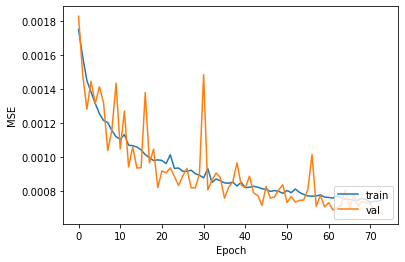

(26523, 1)
(106090, 32)
(106090, 1)
(26523, 32)


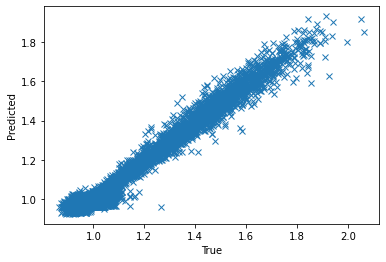

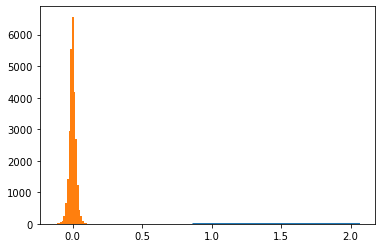

Model: "sequential_437"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3213 (Dense)           (None, 32)                1056      
_________________________________________________________________
dense_3214 (Dense)           (None, 128)               4224      
_________________________________________________________________
dense_3215 (Dense)           (None, 64)                8256      
_________________________________________________________________
dense_3216 (Dense)           (None, 32)                2080      
_________________________________________________________________
dense_3217 (Dense)           (None, 16)                528       
_________________________________________________________________
dense_3218 (Dense)           (None, 8)                 136       
_________________________________________________________________
dense_3219 (Dense)           (None, 4)              

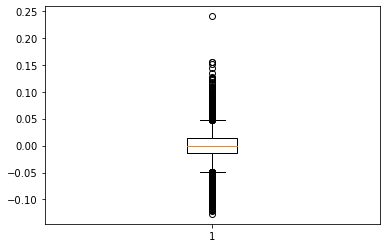

In [120]:
model_path = r"\best_models\mlp\97_trained_on_entire_train_set.h5"
history_path = r"\best_models\mlp\history.json"
data_dir_path = r"\data_final\data_splits\\0"

#model_path = r"\best_models\mlp\97_trained_on_entire_train_set.h5"
#history_path = r"\best_models\mlp\history.json"

def read_data_and_model_information(data_dir_path, model_path, history_path):
    
    
    history = json.load(open(history_path))
    plt.plot(history['loss'][1:], label='train')#, ax=axs[0])
    plt.plot(history['val_loss'][1:], label='val')#, ax = axs[0])
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend(loc='lower right')
    plt.show()
    
    model = tf.keras.models.load_model(model_path)
    train_path = data_dir_path
    test_path = r"\data_final\data_splits\\test_set"
    data_split_0_path = r"\data_final\data_splits\\0"
    #file_list = [os.path.join(data_split_0_path, f) for f in os.listdir(train_path) if os.path.isfile(os.path.join(train_path, f))] 
    
    data_file_list = []
    for f in os.listdir(data_split_0_path):
        data_file_list.append(os.path.join(data_split_0_path, f))
    X_train = pd.read_csv(data_file_list[0])
    X_valid = pd.read_csv(data_file_list[1])
    y_train = np.loadtxt(os.path.join(data_file_list[2]), delimiter=",")
    y_valid = np.loadtxt(os.path.join(data_file_list[3]), delimiter=",")
    y_train = pd.DataFrame(data=y_train)
    y_valid = pd.DataFrame(data=y_valid)
    X_train.pop("Unnamed: 0")
    X_valid.pop("Unnamed: 0")

    X_test = pd.read_csv(r"\data_final\data_splits\test_set\X_test.csv")
    X_test.pop("Unnamed: 0")
    y_test = pd.read_csv(r"\data_final\data_splits\test_set\y_test.csv")
    y_test.pop("index")

    X_train_complete=pd.concat([X_train, X_valid])
    y_train_complete=pd.concat([y_train, y_valid])

    print(y_test.shape)
    print(X_train_complete.shape)
    print(y_train_complete.shape)
    print(X_test.shape)
    
    
    standard_scaler = StandardScaler()
    X_train_scaled = standard_scaler.fit_transform(X_train_complete)
    X_test_scaled = standard_scaler.transform(X_test)
    
    
    X_train_reshaped = np.array(X_train_scaled).reshape(X_train_scaled.shape[0],32,1) 
    X_test_reshaped = np.array(X_test_scaled).reshape(X_test_scaled.shape[0],32,1)
    
    
    
    y_pred = model.predict(X_test_scaled)
    #y_pred = model.predict(X_test)
    plt.plot(y_test, y_pred, "x")
    plt.xlabel("True")
    plt.ylabel("Predicted")
    
    
    result = model.predict(X_test_scaled)#[:,0]
    #result = model.predict(X_test)[:,0]
    plt.show()
    plt.errorbar(y_test, result)
    
    
    fehler_rel = (y_test - result)/y_test
    fehler_rel = np.nan_to_num(fehler_rel)
    fehler_rel_mean = np.mean(fehler_rel)
    fehler_rel_std = np.std(fehler_rel)

    plt.hist(fehler_rel, bins = 30)
    plt.show()
    
    fig1, ax1 = plt.subplots()
    whis = ((fehler_rel_mean - 2* fehler_rel_std)/fehler_rel_mean,(fehler_rel_mean + 2*fehler_rel_std)/fehler_rel_mean)

    ax1.boxplot(fehler_rel, whis = (2.5,97.5))
    
    print(model.summary())
    print(model_path)
    

    

read_data_and_model_information(data_dir_path, model_path, history_path)

# Plots CNN und MLP

X_train:  (84872, 32)
y_train:  (84872,)
X_valid:  (21218, 32)
y_valid:  (21218,)
X_train_new:  (106090, 32)
y_train_new:  (106090,)
X_test:  (26523, 32)
y_test:  (26523,)


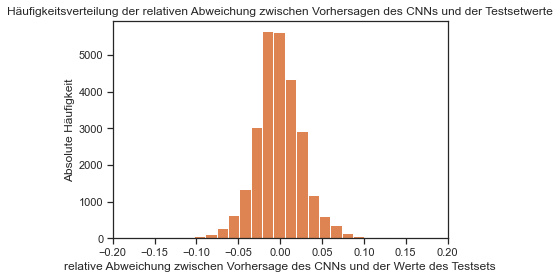

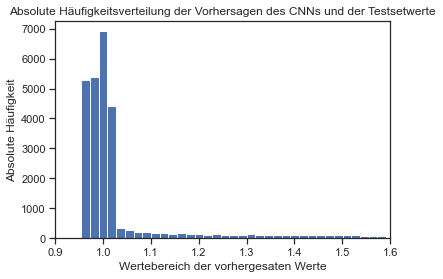

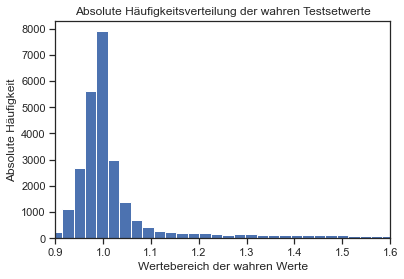

SNS PLOT
Vorhersagen des CNN-Modells auf dem Testset


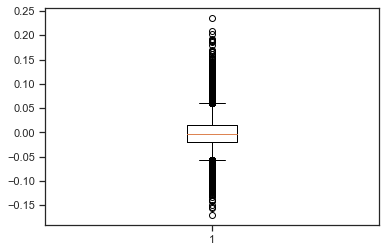

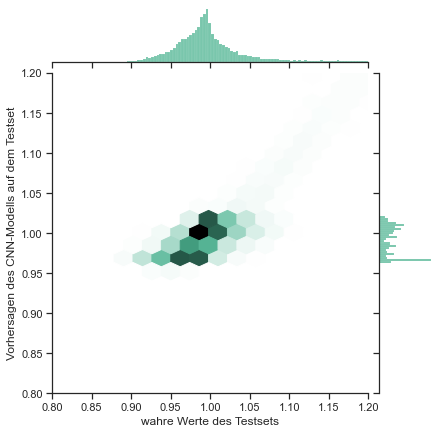

In [54]:
history_path = r"\best_models\cnn\history.json"
history = json.load(open(history_path))
#plt.plot(history['loss'][1:], label='Trainingsset')#, ax=axs[0])
#plt.plot(history['val_loss'][1:], label='Testset')#, ax = axs[0])
#plt.xlabel('Epoche')
#plt.ylabel('mittlerer quadratischer Fehler')
#plt.legend(loc='upper right')
#axis = plt.gca()
#axis.set_ylim((0,0.1))
#plt.title("Lernkurven des besten CNN-Modells auf dem gesamten Trainings- und Testset")
#plt.show()

model = keras.models.load_model(r"\best_models\cnn\88_trained_on_entire_train_set.h5")
#print(model.summary())
#DATEN HIER ERNEUT EINLESEN UND SKALIEREN
train_data_path = r"\data_final\data_splits\0"
test_data_path = r"\data_final\data_splits\test_set"

X_train = pd.read_csv(train_data_path + "\\X_train.csv")
X_train.pop("Unnamed: 0")
y_train = np.loadtxt(train_data_path + "\\y_train.csv", delimiter=",")
X_valid = pd.read_csv(train_data_path + "\\X_valid.csv")
X_valid.pop("Unnamed: 0")
y_valid = np.loadtxt(train_data_path + "\\y_valid.csv", delimiter=",")
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_valid: ", X_valid.shape)
print("y_valid: ", y_valid.shape)

X_train_new = pd.concat([X_train, X_valid])
print("X_train_new: ", X_train_new.shape)
y_train_new = np.concatenate((y_train, y_valid))
print("y_train_new: ", y_train_new.shape)

X_test = pd.read_csv(test_data_path + "\\X_test.csv")
X_test.pop("Unnamed: 0")
y_test = pd.read_csv(test_data_path + "\\y_test.csv")
y_test.pop("index")
y_test = y_test.to_numpy()[:,0]
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

standard_scaler = StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train_new)
X_test_scaled = standard_scaler.transform(X_test)

X_train_reshaped = np.array(X_train_scaled).reshape(X_train_scaled.shape[0],32,1) 
X_test_reshaped = np.array(X_test_scaled).reshape(X_test_scaled.shape[0],32,1)
#y_pred = model.predict(X_test_scaled)#
y_pred = model.predict(X_test_reshaped)
#plt.plot(y_test, y_pred, "x")
#plt.xlabel("True")
#plt.ylabel("Predicted") 
    
#result = model.predict(X_test_scaled)[:,0]
result = model.predict(X_test_reshaped)[:,0]
plt.show()
plt.errorbar(y_test, result)
    
fehler_rel = (y_test - result)/y_test
fehler_rel = np.nan_to_num(fehler_rel)
fehler_rel_mean = np.mean(fehler_rel)
fehler_rel_std = np.std(fehler_rel)

plt.hist(fehler_rel,  30, )
plt.xlim(-0.2, 0.2)
plt.title("Häufigkeitsverteilung der relativen Abweichung zwischen Vorhersagen des CNNs und der Testsetwerte")
plt.xlabel("relative Abweichung zwischen Vorhersage des CNNs und der Werte des Testsets")
plt.ylabel("Absolute Häufigkeit")
plt.show()
    

plt.hist(np.squeeze(y_pred), bins=50)
plt.xlim(0.9, 1.6)
plt.title("Absolute Häufigkeitsverteilung der Vorhersagen des CNNs und der Testsetwerte")
plt.xlabel("Wertebereich der vorhergesaten Werte")
plt.ylabel("Absolute Häufigkeit")
plt.show()


plt.hist(y_test, bins=50)
plt.xlim(0.9, 1.6)
plt.title("Absolute Häufigkeitsverteilung der wahren Testsetwerte")
plt.xlabel("Wertebereich der wahren Werte")
plt.ylabel("Absolute Häufigkeit")
plt.show()
    
    
fig1, ax1 = plt.subplots()
whis = ((fehler_rel_mean - 2* fehler_rel_std)/fehler_rel_mean,(fehler_rel_mean + 2*fehler_rel_std)/fehler_rel_mean)
ax1.boxplot(fehler_rel, whis = (2.5,97.5))
fehler_rel_cnn = fehler_rel


print("SNS PLOT")
sns.set_theme(style="ticks")
plot = sns.jointplot(x=y_test, y=np.squeeze(y_pred), kind="hex", color="#4CB391")
plot.ax_marg_x.set_xlim(0.8, 1.2)
plot.ax_marg_y.set_ylim(0.8,1.2)
plot.ax_joint.set_xlabel("wahre Werte des Testsets")
plot.ax_joint.set_ylabel("Vorhersagen des CNN-Modells auf dem Testset")
print("Vorhersagen des CNN-Modells auf dem Testset")
#plot.set(xlabel="wahre Werte des Testset", ylabel="Vorhergesagen des Modells auf dem Testset")
#plot.title("Verteilungen der durch das MLP-Modell vorhergesagten und wahren Werte des Testset")
#plt.show()

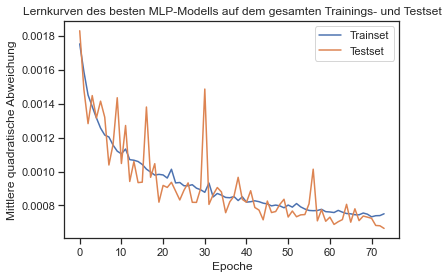

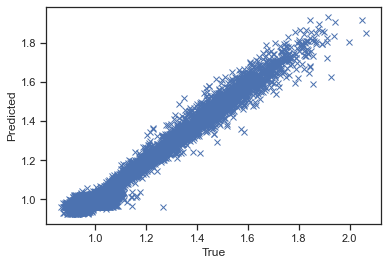

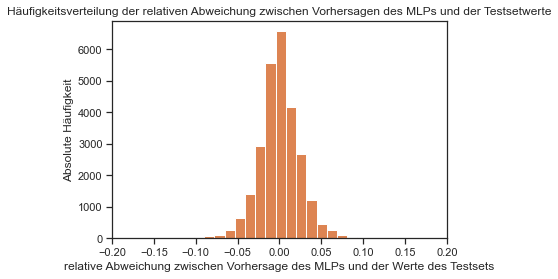

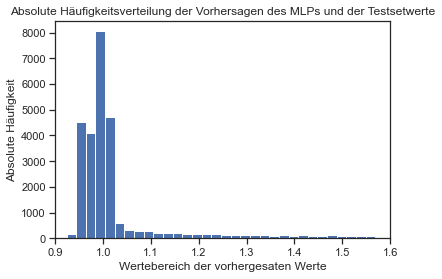

Model: "sequential_437"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3213 (Dense)           (None, 32)                1056      
_________________________________________________________________
dense_3214 (Dense)           (None, 128)               4224      
_________________________________________________________________
dense_3215 (Dense)           (None, 64)                8256      
_________________________________________________________________
dense_3216 (Dense)           (None, 32)                2080      
_________________________________________________________________
dense_3217 (Dense)           (None, 16)                528       
_________________________________________________________________
dense_3218 (Dense)           (None, 8)                 136       
_________________________________________________________________
dense_3219 (Dense)           (None, 4)              

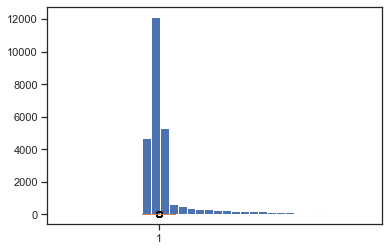

y_test


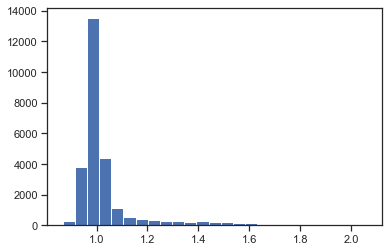

SNS PLOT


Text(25.125, 0.5, 'Vorhersagen des MLP-Modells auf dem Testset')

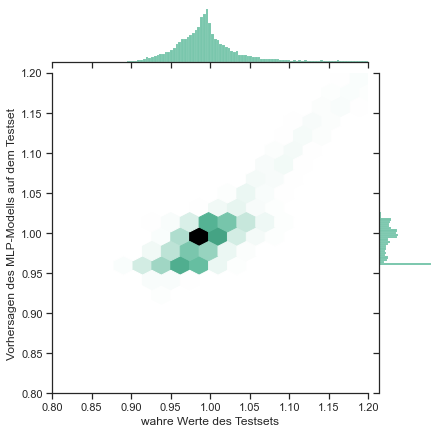

In [55]:

history_path = r"\best_models\mlp\history.json"
history = json.load(open(history_path))
plt.plot(history['loss'][1:], label='Trainset')#, ax=axs[0])
plt.plot(history['val_loss'][1:], label='Testset')#, ax = axs[0])
plt.xlabel('Epoche')
plt.ylabel('Mittlere quadratische Abweichung')
plt.legend(loc='upper right')
plt.title("Lernkurven des besten MLP-Modells auf dem gesamten Trainings- und Testset")
plt.show()


model = keras.models.load_model(r"\best_models\mlp\97_trained_on_entire_train_set.h5")

#y_pred = model.predict(X_test_scaled)
y_pred = model.predict(X_test_scaled)
plt.plot(y_test, y_pred, "x")
plt.xlabel("True")
plt.ylabel("Predicted") 
    
result = model.predict(X_test_scaled)[:,0]
#result = model.predict(X_test_reshaped)[:,0]
plt.show()
plt.errorbar(y_test, result)

fehler_rel = (y_test - result)/y_test
fehler_rel = np.nan_to_num(fehler_rel)
fehler_rel_mean = np.mean(fehler_rel)
fehler_rel_std = np.std(fehler_rel)

plt.hist(fehler_rel,  30, )
plt.xlim(-0.2, 0.2)
plt.title("Häufigkeitsverteilung der relativen Abweichung zwischen Vorhersagen des MLPs und der Testsetwerte")
plt.xlabel("relative Abweichung zwischen Vorhersage des MLPs und der Werte des Testsets")
plt.ylabel("Absolute Häufigkeit")
plt.show()

plt.hist(np.squeeze(y_pred), bins=50)
plt.xlim(0.9, 1.6)
plt.title("Absolute Häufigkeitsverteilung der Vorhersagen des MLPs und der Testsetwerte")
plt.xlabel("Wertebereich der vorhergesaten Werte")
plt.ylabel("Absolute Häufigkeit")
plt.show()
    
fig1, ax1 = plt.subplots()
whis = ((fehler_rel_mean - 2* fehler_rel_std)/fehler_rel_mean,(fehler_rel_mean + 2*fehler_rel_std)/fehler_rel_mean)
ax1.boxplot(fehler_rel, whis = (2.5,97.5))

print(model.summary())

fehler_rel_mlp = fehler_rel

print("y_pred")
plt.hist(np.squeeze(y_pred), bins=25)
plt.show()
print("y_test")
plt.hist(y_test, bins=25)
plt.show()

print("SNS PLOT")
sns.set_theme(style="ticks")
plot = sns.jointplot(x=y_test, y=np.squeeze(y_pred), kind="hex", color="#4CB391")
plot.ax_marg_x.set_xlim(0.8, 1.2)
plot.ax_marg_y.set_ylim(0.8,1.2)
plot.ax_joint.set_xlabel("wahre Werte des Testsets")
plot.ax_joint.set_ylabel("Vorhersagen des MLP-Modells auf dem Testset")
#print("Vorhersagen des MLP-Modells auf dem Testset")
#plot.set(xlabel="wahre Werte des Testset", ylabel="Vorhergesagen des Modells auf dem Testset")
#plot.title("Verteilungen der durch das MLP-Modell vorhergesagten und wahren Werte des Testset")
#plt.show()

# Boxplots CNN, MLP

In [113]:
# Train worst models

# read data and create entire test set (from valid and smaller test set) and read test set

train_data_path = r"\data_final\data_splits\0"
test_data_path = r"\data_final\data_splits\test_set"

X_train = pd.read_csv(train_data_path + "\\X_train.csv")
X_train.pop("Unnamed: 0")
y_train = np.loadtxt(train_data_path + "\\y_train.csv", delimiter=",")
X_valid = pd.read_csv(train_data_path + "\\X_valid.csv")
X_valid.pop("Unnamed: 0")
y_valid = np.loadtxt(train_data_path + "\\y_valid.csv", delimiter=",")
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_valid: ", X_valid.shape)
print("y_valid: ", y_valid.shape)

X_train_new = pd.concat([X_train, X_valid])
print("X_train_new: ", X_train_new.shape)
y_train_new = np.concatenate((y_train, y_valid))
print("y_train_new: ", y_train_new.shape)

X_test = pd.read_csv(test_data_path + "\\X_test.csv")
X_test.pop("Unnamed: 0")
y_test = pd.read_csv(test_data_path + "\\y_test.csv")
y_test.pop("index")
y_test = y_test.to_numpy()[:,0]
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

# scale data
standard_scaler = StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train_new)
X_test_scaled = standard_scaler.transform(X_test)

# reshape data, necessary for cnn 
X_train_reshaped = np.array(X_train_scaled).reshape(X_train_scaled.shape[0],1,32) 
X_test_reshaped = np.array(X_test_scaled).reshape(X_test_scaled.shape[0],1,32)


worst_cnn_untrained_path = r"\untrained_cnn_models\39.h5"
worst_mlp_untrained_path = r"\untrained_mlp_models\49.h5"
new_worst_mlp_path = r"\worst_models\mlp\49_trained_on_entire_train_set.h5"
new_worst_cnn_path = r"\worst_models\cnn\39_trained_on_entire_train_set.h5"
history_cnn_path = r"\worst_models\cnn\history.json"
history_mlp_path = r"\worst_models\mlp\history.json"

#mlp_model = keras.models.load_model(worst_mlp_untrained_path)
#early_stopping_callback = tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
#best_checkpoint = tf.keras.callbacks.ModelCheckpoint(new_worst_mlp_path)
#mlp_history = model.fit(X_train_scaled, y_train_new, validation_data=(X_test_scaled, y_test),callbacks=[early_stopping_callback, best_checkpoint], epochs = 75, batch_size = 32)
#mlp_model.save(new_worst_mlp_path)
#mlp_history_dict = mlp_history.history
#with open(history_mlp_path, "w") as hf:
#    json.dump(mlp_history_dict, hf)
mlp_model = tf.keras.models.load_model(new_worst_mlp_path)

#cnn_model = keras.models.load_model(worst_cnn_untrained_path)
#print(cnn_model.summary())
#early_stopping_callback = tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
#best_checkpoint = tf.keras.callbacks.ModelCheckpoint(new_worst_cnn_path)
#cnn_history = model.fit(X_train_reshaped, y_train_new, validation_data=(X_test_reshaped, y_test),callbacks=[early_stopping_callback, best_checkpoint], epochs = 75, batch_size = 32)
#cnn_model.save(new_worst_cnn_path)
#cnn_history_dict = cnn_history.history
#with open(history_cnn_path, "w") as hf:
#    json.dump(cnn_history_dict, hf)
X_train_reshaped = np.array(X_train_scaled).reshape(X_train_scaled.shape[0],32,1) 
X_test_reshaped = np.array(X_test_scaled).reshape(X_test_scaled.shape[0],32,1)
cnn_model = keras.models.load_model(new_worst_cnn_path)
print(cnn_model.summary())


X_train:  (84872, 32)
y_train:  (84872,)
X_valid:  (21218, 32)
y_valid:  (21218,)
X_train_new:  (106090, 32)
y_train_new:  (106090,)
X_test:  (26523, 32)
y_test:  (26523,)
Model: "sequential_243"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1173 (Conv1D)         (None, 32, 32)            64        
_________________________________________________________________
conv1d_1174 (Conv1D)         (None, 31, 16)            1040      
_________________________________________________________________
conv1d_1175 (Conv1D)         (None, 28, 8)             520       
_________________________________________________________________
conv1d_1176 (Conv1D)         (None, 21, 4)             260       
_________________________________________________________________
conv1d_1177 (Conv1D)         (None, 6, 2)              130       
_________________________________________________________________
global_avera

In [115]:
result_worst_mlp = mlp_model.predict(X_test_scaled)[:,0] 
fehler_rel_worst_mlp = (y_test - result_worst_mlp)/y_test
result_worst_cnn = cnn_model.predict(X_test_reshaped)[:,0]
fehler_rel_worst_cnn = (y_test - result_worst_cnn)

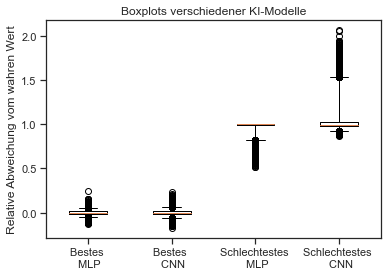

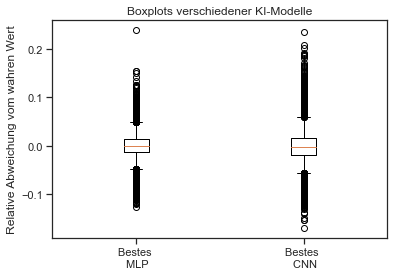

In [117]:
data = [fehler_rel_mlp, fehler_rel_cnn, fehler_rel_worst_mlp, fehler_rel_worst_cnn]
fig1, ax1 = plt.subplots()
ax1.boxplot(data, whis=[2.5, 97.5])
plt.title("Boxplots verschiedener KI-Modelle")
plt.ylabel("Relative Abweichung vom wahren Wert")
plt.xticks([1,2,3,4],["Bestes \n MLP", "Bestes \n CNN", "Schlechtestes \n MLP", "Schlechtestes \n CNN"])
plt.show()

data = [fehler_rel_mlp, fehler_rel_cnn]
fig1, ax1 = plt.subplots()
ax1.boxplot(data, whis=[2.5, 97.5])
plt.title("Boxplots verschiedener KI-Modelle")
plt.ylabel("Relative Abweichung vom wahren Wert")
plt.xticks([1,2],["Bestes \n MLP", "Bestes \n CNN"])
plt.show()
#whis = ((fehler_rel_mean - 2* fehler_rel_std)/fehler_rel_mean,(fehler_rel_mean + 2*fehler_rel_std)/fehler_rel_mean)
#ax1.boxplot(fehler_rel, whis = (2.5,97.5))

#Model creation pipeline

In [1]:
# Model creation pipeline


input_for_grid_search_cnn = {
    "input_shape":(32,1),
    "conv1d_layers":[[{"filters":32, "kernel_size":1, "activation":"relu"},
                      {"filters":16, "kernel_size":2, "activation":"relu"}, 
                      {"filters":8, "kernel_size":4, "activation":"relu"},
                      {"filters":4, "kernel_size":8, "activation":"relu"},
                      {"filters":2, "kernel_size":16, "activation":"relu"}
                     ],
                    ],
    "pooling_or_flatten_layer":[tf.keras.layers.GlobalAveragePooling1D(), tf.keras.layers.Flatten()],
    "number_of_neurons_per_hidden_layer":[[32], [128,64,32,16,8,4,2], [64,32,16,8,4,2], [32,16,8,4,2], [16,8,4,2]],
    "activation_function_in_hidden_layer":"relu",
    #"regularizer":False,
    "dropout_layer_parameter" : [[0.25, random_seed], [0.1, random_seed], []],
    #"dropout_after_every_hidden_layer":True,
    "dropout_after_every_hidden_layer":False,
    "loss_function":"mse",
    "optimizer": [tf.keras.optimizers.Adam(learning_rate=0.0001), tf.keras.optimizers.Adam(learning_rate=0.001), tf.keras.optimizers.Adam(learning_rate=0.01)],
    "metrics": ["mse"],
    "batch_size": None
}
    


#Hyperparameteroptimizing
def create_input_object_for_model_creation_cnn(input_for_grid_search):
    keys_that_hold_lists_normaly = ["conv1d_layers","number_of_neurons_per_hidden_layer", "dropout_layer_parameter", "metrics"]
    keys_that_not_hold_lists = [key for key in input_for_grid_search.keys() if key not in keys_that_hold_lists_normaly]
    keys_with_hyperparameter_to_tune = []
    keys_with_hyperparameter_not_to_tune = []
    object_with_hyperparameter = {}
    list_of_objects_for_model_creation = []

    for key in input_for_grid_search.keys():
        for k in keys_that_hold_lists_normaly:
            if key == k:
                if isinstance(input_for_grid_search[key][0], list): # holds list of list --> hyperparamter_to_tune
                    keys_with_hyperparameter_to_tune.append(key)
        for k in keys_that_not_hold_lists:
            if key == k:
                if isinstance(input_for_grid_search[key], list):
                    keys_with_hyperparameter_to_tune.append(key)
    
    for key in input_for_grid_search.keys():
        if key not in keys_with_hyperparameter_to_tune:
            keys_with_hyperparameter_not_to_tune.append(key)

    for key in input_for_grid_search.keys():
        for k in keys_with_hyperparameter_to_tune:
            if key == k:
                temp_object = {key: input_for_grid_search[key]}
                object_with_hyperparameter[key] = input_for_grid_search[key]
                
    for conv1d_layers in input_for_grid_search["conv1d_layers"]:
        for pooling_or_flatten_layer in input_for_grid_search["pooling_or_flatten_layer"]:
            for number_of_neurons_per_hidden_layer in input_for_grid_search["number_of_neurons_per_hidden_layer"]:
                for dropout_layer_parameter in input_for_grid_search["dropout_layer_parameter"]:
                    for optimizer in input_for_grid_search["optimizer"]:
                        temp_object = {"conv1d_layers":conv1d_layers,
                                       "pooling_or_flatten_layer":pooling_or_flatten_layer,
                                       "number_of_neurons_per_hidden_layer":number_of_neurons_per_hidden_layer, 
                                       "dropout_layer_parameter":dropout_layer_parameter, 
                                       "optimizer":optimizer
                                      }
                        
                        for key in keys_with_hyperparameter_not_to_tune:
                            temp_object[key] = input_for_grid_search[key]
                        list_of_objects_for_model_creation.append(temp_object)
    
    #for hyperparam in keys_with_hyperparameter_to_tune:
    #    for hyperparam_value in input_for_grid_search[hyperparam]:
    #        print(hyperparam, hyperparam_value)
    #print(keys_with_hyperparameter_to_tune)        
     
    return list_of_objects_for_model_creation


def build_cnn_model_from_instruction(instruction_object):
    model = tf.keras.models.Sequential()
    for i in range(len(instruction_object["conv1d_layers"])):
        if i == 0:
            model.add(tf.keras.layers.Conv1D(filters = instruction_object["conv1d_layers"][i]["filters"], 
                                            kernel_size = instruction_object["conv1d_layers"][i]["kernel_size"], 
                                            input_shape = instruction_object["input_shape"],
                                            activation = instruction_object["conv1d_layers"][i]["activation"]))
        else:
            model.add(tf.keras.layers.Conv1D(filters = instruction_object["conv1d_layers"][i]["filters"],
                                            kernel_size = instruction_object["conv1d_layers"][i]["kernel_size"],
                                            activation = instruction_object["conv1d_layers"][i]["activation"]))
    model.add(instruction_object["pooling_or_flatten_layer"])
    for i in range(len(instruction_object["number_of_neurons_per_hidden_layer"])):
        model.add(tf.keras.layers.Dense(units = instruction_object["number_of_neurons_per_hidden_layer"][i], 
                                        activation = instruction_object["activation_function_in_hidden_layer"]))
        
        #if len(instruction_object["dropout_layer_parameter"]) > 0:
        #    if instruction_object["dropout_after_every_hidden_layer"]:
        #        model.add(layers.Dropout(rate = input_object["dropout_layer_parameter"][0], 
        #                                 seed = input_object["dropout_layer_parameter"][1]))
        #    else:
        #        for layer_index in instruction_object["dropout_after_layer"]:
        #            if i == layer_index:
        #                model.add(layers.Dropout(rate = input_object["dropout_layer_parameter"][0], 
        #                                         seed = input_object["dropout_layer_parameter"][1]))

    if len(instruction_object["dropout_layer_parameter"]) > 0:
        model.add(tf.keras.layers.Dropout(rate = instruction_object["dropout_layer_parameter"][0],
                            seed = instruction_object["dropout_layer_parameter"][1]))
    #output layer    
    model.add(tf.keras.layers.Dense(units = 1)) 
    #compile model
    model.compile(loss = instruction_object["loss_function"], 
                  optimizer = instruction_object["optimizer"], 
                  metrics = instruction_object["metrics"])
    return model

#model_path = r"D:\Studenten\DA_Hakenbeck\Python\models\0.h5"
#data_dir = r"D:\Studenten\DA_Hakenbeck\Python\data_set_splits\0"
#histories_dir = r"D:\Studenten\DA_Hakenbeck\Python\models\histories"
def build_1d_cnn_model():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv1D(filters = 32, strides = 1, kernel_size = 1, input_shape = (32,1)))
    model.add(tf.keras.layers.Conv1D(filters = 8, kernel_size = 4, activation = "relu"))
    model.add(tf.keras.layers.Conv1D(filters = 4, kernel_size = 8, activation = "relu"))
    model.add(tf.keras.layers.Conv1D(filters = 2, kernel_size = 16, activation = "relu"))
    model.add(tf.keras.layers.GlobalAveragePooling1D())
    model.add(tf.keras.layers.Dense(units = 32, activation = "relu"))
    model.add(tf.keras.layers.Dense(units = 1))
    model.compile(loss="mse", optimizer="adam", metrics=["mse"])
    print(model.summary())
    
    return model
def load_train_and_safe(model_path, data_dir, histories_dir, batch_size):
    data_directory = os.path.join(data_dir)
    new_model_path = model_path.split(".")[0].rsplit("\\", 1)[0]+"\\trained\\"+model_path.rsplit(".",1)[0].rsplit("\\",1)[-1]+"trained_on_ds_"+data_directory.rsplit("\\", 1)[-1]+"bs"+str(batch_size)+"."+model_path.split(".")[1]
    history_path = r"D:\Studenten\DA_Hakenbeck\Python\models_mlp_v3_right_data\histories"+ "\\" + model_path.rsplit(".",1)[0].rsplit("\\",1)[-1]+"trained_on_ds_"+data_directory.rsplit("\\", 1)[-1]+"bs"+str(batch_size)+".json"
    model = keras.models.load_model(model_path)
    file_list = os.listdir(data_directory)
    X_train = pd.read_csv(os.path.join(data_directory, file_list[0]))
    X_train.pop("Unnamed: 0")
    X_valid = pd.read_csv(os.path.join(data_directory, file_list[1]))
    X_valid.pop("Unnamed: 0")
    y_train = np.loadtxt(os.path.join(data_directory, file_list[2]), delimiter=",")
    y_valid = np.loadtxt(os.path.join(data_directory, file_list[3]), delimiter=",")
    standard_scaler = StandardScaler()
    X_train_scaled = standard_scaler.fit_transform(X_train)
    X_valid_scaled = standard_scaler.transform(X_valid)
    #Implement Callback
    early_stopping_callback = tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
    best_checkpoint = tf.keras.callbacks.ModelCheckpoint(new_model_path)
    history = model.fit(X_train_scaled, y_train, validation_data=(X_valid_scaled, y_valid),callbacks=[early_stopping_callback, best_checkpoint], epochs = 75, batch_size = batch_size)
    model.save(new_model_path)
    history_dict = history.history
    with open(history_path, "w") as hf:
        json.dump(history_dict, hf)

model_root_path = r"D:\Studenten\DA_Hakenbeck\Python\models_mlp_v3_right_data"
def save_models(model_root_path, model_list):
    for i in range(len(model_list)):
        model = model_list[i]
        model_name = str(i)+".h5"
        model_path = os.path.join(model_root_path, model_name)
        #print(model_path)
        model.save(model_path)
        
instructions_list = create_input_object_for_model_creation_cnn(input_for_grid_search_cnn)
model_list = []
for instruction in instructions_list:
    model_list.append(build_cnn_model_from_instruction(instruction))

data_dir = r"D:\Studenten\DA_Hakenbeck\Python\data_set_splits_right\0"
model_root_path = r"D:\Studenten\DA_Hakenbeck\Python\models_cnn_v1_right_data"
histories_dir = r"D:\Studenten\DA_Hakenbeck\Python\models_cnn_v1_right_data\histories"
batch_size = 32
save_models(model_root_path, model_list)
for i in range(90):
    model_path_flexible = r"D:\Studenten\DA_Hakenbeck\Python\models_cnn_v1_right_data\{index}.h5".format(index=str(i))
    data_dir_flexible = r"D:\Studenten\DA_Hakenbeck\Python\data_set_splits_right\0"
    load_train_and_safe(model_path_flexible, data_dir_flexible,histories_dir, 32)

NameError: name 'tf' is not defined

#Pipeline for Model creation

In [38]:

    
model_performance_list = [] 
model_path_list = []

trained_model_path = r"D:\Studenten\DA_Hakenbeck\Python\models_cnn_v1_right_data\trained\{index}trained_on_ds_0bs32.h5"
history_path = r"D:\Studenten\DA_Hakenbeck\Python\models_mlp_v3_right_data\histories\{index}trained_on_ds_0bs32.json"
data_directory = r"D:\Studenten\DA_Hakenbeck\Python\data_set_splits_right\0"

for i in range(10):
    trained_model_path = r"D:\Studenten\DA_Hakenbeck\Python\models_mlp_v3_right_data\trained\{index}trained_on_ds_0bs32.h5".format(index=str(i))
    performance, model_path = get_performance_on_valid_set_for_model(trained_model_path, data_directory)
    model_performance_list.append(performance)
    model_path_list.append(model_path)
    
def get_best_model_performance(model_performance_list, model_path_list):
    min_mse = min(model_performance_list)
    index = model_performance_list.index(min_mse)
    model_path = model_path_list[index]
    print("BEST MSE: ", min_mse)
    print("MODEL PATH : ", model_path)
    return index

index = get_best_model_performance(model_performance_list, model_path_list)

MODEL PATH:  D:\Studenten\DA_Hakenbeck\Python\models_mlp_v3_right_data\trained\0trained_on_ds_0bs32.h5
PERFORMANCE MEASUREMENT:  0.008852506745095154
MODEL PATH:  D:\Studenten\DA_Hakenbeck\Python\models_mlp_v3_right_data\trained\1trained_on_ds_0bs32.h5
PERFORMANCE MEASUREMENT:  0.006720725499521943
MODEL PATH:  D:\Studenten\DA_Hakenbeck\Python\models_mlp_v3_right_data\trained\2trained_on_ds_0bs32.h5
PERFORMANCE MEASUREMENT:  0.017137705002141016
MODEL PATH:  D:\Studenten\DA_Hakenbeck\Python\models_mlp_v3_right_data\trained\3trained_on_ds_0bs32.h5
PERFORMANCE MEASUREMENT:  0.008228102836913586
MODEL PATH:  D:\Studenten\DA_Hakenbeck\Python\models_mlp_v3_right_data\trained\4trained_on_ds_0bs32.h5
PERFORMANCE MEASUREMENT:  0.021743747418193446
MODEL PATH:  D:\Studenten\DA_Hakenbeck\Python\models_mlp_v3_right_data\trained\5trained_on_ds_0bs32.h5
PERFORMANCE MEASUREMENT:  0.004744157005300218
MODEL PATH:  D:\Studenten\DA_Hakenbeck\Python\models_mlp_v3_right_data\trained\6trained_on_ds_0bs32.

In [46]:
#y_valid, model.predict(X_valid_scaled)
model_path = r"D:\Studenten\DA_Hakenbeck\Python\trained_mlp_models\97trained_on_ds_0bs32.h5"
X_train = pd.read_csv(r"D:\Studenten\DA_Hakenbeck\Python\data_final\data_splits\0\X_train.csv")
X_train.pop("Unnamed: 0")
X_valid = pd.read_csv(r"D:\Studenten\DA_Hakenbeck\Python\data_final\data_splits\0\X_valid.csv")
X_valid.pop("Unnamed: 0")
y_train = np.loadtxt(os.path.join(r"D:\Studenten\DA_Hakenbeck\Python\data_final\data_splits\0\y_train.csv"), delimiter=",")
y_valid = np.loadtxt(os.path.join(r"D:\Studenten\DA_Hakenbeck\Python\data_final\data_splits\0\y_valid.csv"), delimiter=",")
standard_scaler = StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train)
X_valid_scaled = standard_scaler.transform(X_valid)
print("DONE")
model = keras.models.load_model(model_path)



DONE


In [13]:
model_performance_list = []
model_path_list = []
for i in range(90):
    trained_model_path_flexible = r"D:\Studenten\DA_Hakenbeck\Python\trained_mlp_models\{index}trained_on_ds_0bs32.h5".format(index=str(i))
    history_path_flexible = r"D:\Studenten\DA_Hakenbeck\Python\mlp_histories\{index}trained_on_ds_0bs32.json".format(index=str(i))
    data_path_flexible = r"D:\Studenten\DA_Hakenbeck\Python\data_final\data_splits\0"
    performance, trained_model_path = evaluate_trained_model(trained_model_path_flexible, history_path_flexible, data_path_flexible)
    model_performance_list.append(performance)
    model_path_list.append(trained_model_path)

VALID MAE:  0.0077048884092013725
VALID MAE:  0.006686624641021429
VALID MAE:  0.01180413275171897
VALID MAE:  0.006581146390588984
VALID MAE:  0.02146732893802491
VALID MAE:  0.003986014677976819
VALID MAE:  0.006774177450049331
VALID MAE:  0.0025146204752034365
VALID MAE:  0.021473095544238402
VALID MAE:  0.02146763752674543
VALID MAE:  0.017862372945129636
VALID MAE:  0.01592409834772014
VALID MAE:  0.02047133337510106
VALID MAE:  0.021467416531368015
VALID MAE:  0.02146871877083498
VALID MAE:  0.002147944510304468
VALID MAE:  0.0014253586547975446
VALID MAE:  0.001239551883092108
VALID MAE:  0.0015426895052059167
VALID MAE:  0.021470625663748213
VALID MAE:  0.006531524428939074
VALID MAE:  0.0065155079896298965
VALID MAE:  0.005134513359837074
VALID MAE:  0.011698309150526701
VALID MAE:  0.02146739353870577
VALID MAE:  0.0031314056135450874
VALID MAE:  0.002580975932768944
VALID MAE:  0.0023570820204454734
VALID MAE:  0.0034698740616958402
VALID MAE:  0.021477094006459647
VALID MAE

KeyboardInterrupt: 

In [1]:


def prepare_data_for_mlp_and_cnn(file_list):
    list_of_dataframes = []
    for path in file_list:
        df = pd.read_csv(path)
        list_of_dataframes.append(df.iloc[1:]) #first row is all Zeros TEST FIRST!
    data = pd.concat(list_of_dataframes)
    data.pop("Unnamed: 0")
    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]
    return X, y

def get_and_split_data_into_train_and_test(main_path, test_size, random_seed):
    X, y = prepare_data_for_mlp_and_cnn(get_data(main_path))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_seed) 
    return X_train, X_test, y_train, y_test

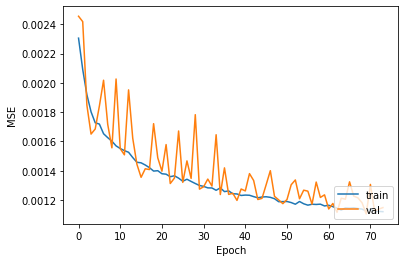

(26523, 1)
(106090, 32)
(106090, 1)
(26523, 32)


ValueError: in user code:

    D:\Studenten\DA_Hakenbeck\anaconda\envs\Hakenbeck_DA_ML\lib\site-packages\tensorflow\python\keras\engine\training.py:1462 predict_function  *
        return step_function(self, iterator)
    D:\Studenten\DA_Hakenbeck\anaconda\envs\Hakenbeck_DA_ML\lib\site-packages\tensorflow\python\keras\engine\training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    D:\Studenten\DA_Hakenbeck\anaconda\envs\Hakenbeck_DA_ML\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    D:\Studenten\DA_Hakenbeck\anaconda\envs\Hakenbeck_DA_ML\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    D:\Studenten\DA_Hakenbeck\anaconda\envs\Hakenbeck_DA_ML\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    D:\Studenten\DA_Hakenbeck\anaconda\envs\Hakenbeck_DA_ML\lib\site-packages\tensorflow\python\keras\engine\training.py:1445 run_step  **
        outputs = model.predict_step(data)
    D:\Studenten\DA_Hakenbeck\anaconda\envs\Hakenbeck_DA_ML\lib\site-packages\tensorflow\python\keras\engine\training.py:1418 predict_step
        return self(x, training=False)
    D:\Studenten\DA_Hakenbeck\anaconda\envs\Hakenbeck_DA_ML\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    D:\Studenten\DA_Hakenbeck\anaconda\envs\Hakenbeck_DA_ML\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:191 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_292 is incompatible with the layer: : expected min_ndim=3, found ndim=2. Full shape received: [None, 32]


In [119]:
def plot_learning_curve_and_valid_scores(model_path, history_path, data_path):
    
    history = json.load(open(history_path))
    plt.plot(history['loss'][1:], label='train')#, ax=axs[0])
    plt.plot(history['val_loss'][1:], label='val')#, ax = axs[0])
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend(loc='lower right')
    plt.show()
    
    #file_list = os.listdir(r"D:\Studenten\DA_Hakenbeck\Python\data_final\data_splits\0")
    X_train = pd.read_csv(r"D:\Studenten\DA_Hakenbeck\Python\data_final\data_splits\0\X_train.csv")
    X_train.pop("Unnamed: 0")
    X_valid = pd.read_csv(r"D:\Studenten\DA_Hakenbeck\Python\data_final\data_splits\0\X_valid.csv")
    X_valid.pop("Unnamed: 0")
    y_train = np.loadtxt(os.path.join(r"D:\Studenten\DA_Hakenbeck\Python\data_final\data_splits\0\y_train.csv"), delimiter=",")
    y_valid = np.loadtxt(os.path.join(r"D:\Studenten\DA_Hakenbeck\Python\data_final\data_splits\0\y_valid.csv"), delimiter=",")
    standard_scaler = StandardScaler()
    X_train_scaled = standard_scaler.fit_transform(X_train)
    X_valid_scaled = standard_scaler.transform(X_valid)
    
    model = keras.models.load_model(trained_model_path)
    y_pred = model.predict(X_valid_scaled)
    

    plt.plot(y_valid, model.predict(X_valid_scaled), "x")
    plt.xlabel("True")
    plt.ylabel("Predicted")
    plt.show()

    result = model.predict(X_valid_scaled)[:,0]
    print(y_valid.shape)
    print()
    plt.hist2d(y_valid, result, bins=(10,10), cmap=plt.cm.jet)
    
    
    print(model.summary())
    print(model_path)


#history_path = r"D:\Studenten\DA_Hakenbeck\Python\mlp_histories\97trained_on_ds_{}bs32.json"
#data_path = r"D:\Studenten\DA_Hakenbeck\Python\data_final\data_splits\{}"
#trained_mlp_model_path = r"D:\Studenten\DA_Hakenbeck\Python\trained_mlp_models\97trained_on_ds_{}bs32.h5"
#trained_cnn_model_path = r"D:\Studenten\DA_Hakenbeck\Python\trained_cnn_models\88trained_on_ds_{}bs32.h5"
#history_path = r"D:\Studenten\DA_Hakenbeck\Python\cnn_histories\88trained_on_ds_{}bs32.json"
#for i in range(5):
#    history_path = history_path.format(str(i))
#    data_path = data_path.format(str(i))
#    trained_mlp_model_path = trained_cnn_model_path.format(str(i))
#    read_data_and_model_information(data_path, trained_mlp_model_path, history_path)
    
    
    #plot_learning_curve_and_valid_scores(trained_mlp_model_path, history_path, data_path)

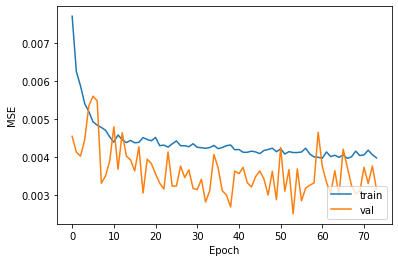

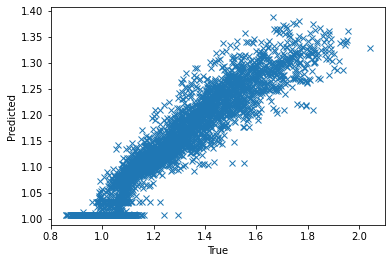

Model: "sequential_401"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2908 (Dense)           (None, 32)                1056      
_________________________________________________________________
dense_2909 (Dense)           (None, 32)                1056      
_________________________________________________________________
dropout_1581 (Dropout)       (None, 32)                0         
_________________________________________________________________
dense_2910 (Dense)           (None, 32)                1056      
_________________________________________________________________
dropout_1582 (Dropout)       (None, 32)                0         
_________________________________________________________________
dense_2911 (Dense)           (None, 16)                528       
_________________________________________________________________
dropout_1583 (Dropout)       (None, 16)             

In [18]:
model_path = r"D:\Studenten\DA_Hakenbeck\Python\trained_mlp_models\7trained_on_ds_0bs32.h5"
history_path = r"D:\Studenten\DA_Hakenbeck\Python\mlp_histories\7trained_on_ds_0bs32.json"
data_path = r"D:\Studenten\DA_Hakenbeck\Python\data_final\data_splits\0"

def plot_learning_curve_and_valid_scores(model_path, history_path, data_path):
    
    history = json.load(open(history_path))
    plt.plot(history['loss'][1:], label='train')#, ax=axs[0])
    plt.plot(history['val_loss'][1:], label='val')#, ax = axs[0])
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend(loc='lower right')
    plt.show()
    
    #file_list = os.listdir(r"D:\Studenten\DA_Hakenbeck\Python\data_final\data_splits\0")
    X_train = pd.read_csv(r"D:\Studenten\DA_Hakenbeck\Python\data_final\data_splits\0\X_train.csv")
    X_train.pop("Unnamed: 0")
    X_valid = pd.read_csv(r"D:\Studenten\DA_Hakenbeck\Python\data_final\data_splits\0\X_valid.csv")
    X_valid.pop("Unnamed: 0")
    y_train = np.loadtxt(os.path.join(r"D:\Studenten\DA_Hakenbeck\Python\data_final\data_splits\0\y_train.csv"), delimiter=",")
    y_valid = np.loadtxt(os.path.join(r"D:\Studenten\DA_Hakenbeck\Python\data_final\data_splits\0\y_valid.csv"), delimiter=",")
    standard_scaler = StandardScaler()
    X_train_scaled = standard_scaler.fit_transform(X_train)
    X_valid_scaled = standard_scaler.transform(X_valid)
    
    model = keras.models.load_model(trained_model_path)
    y_pred = model.predict(X_valid_scaled)
    
    plt.plot(y_valid, model.predict(X_valid_scaled), "x")
    plt.xlabel("True")
    plt.ylabel("Predicted")
    plt.show()
    print(model.summary())
    print(model_path)

#plot_learning_curve_and_valid_scores(model_path, history_path, data_path)

In [34]:
#only cnn

train_data_path = r"D:\Studenten\DA_Hakenbeck\Python\data_final\data_splits\0"
test_data_path = r"D:\Studenten\DA_Hakenbeck\Python\data_final\data_splits\test_set"

X_train = pd.read_csv(train_data_path + "\\X_train.csv")
X_train.pop("Unnamed: 0")
y_train = np.loadtxt(train_data_path + "\\y_train.csv", delimiter=",")
X_valid = pd.read_csv(train_data_path + "\\X_valid.csv")
X_valid.pop("Unnamed: 0")
y_valid = np.loadtxt(train_data_path + "\\y_valid.csv", delimiter=",")
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_valid: ", X_valid.shape)
print("y_valid: ", y_valid.shape)

X_train_new = pd.concat([X_train, X_valid])
print("X_train_new: ", X_train_new.shape)
y_train_new = np.concatenate((y_train, y_valid))
print("y_train_new: ", y_train_new.shape)

X_test = pd.read_csv(test_data_path + "\\X_test.csv")
X_test.pop("Unnamed: 0")
y_test = pd.read_csv(test_data_path + "\\y_test.csv")
y_test.pop("index")
y_test = y_test.to_numpy()[:,0]
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

standard_scaler = StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train_new)
X_test_scaled = standard_scaler.transform(X_test)
X_train_reshaped = np.array(X_train_scaled).reshape(X_train_scaled.shape[0],32,1) 
X_test_reshaped = np.array(X_test_scaled).reshape(X_test_scaled.shape[0],32,1)

new_model_path = r"D:\Studenten\DA_Hakenbeck\Python\best_models\cnn\88_trained_on_entire_train_set.h5"
history_path = r"D:\Studenten\DA_Hakenbeck\Python\best_models\cnn\history.json"
model = keras.models.load_model(r"D:\Studenten\DA_Hakenbeck\Python\untrained_cnn_models\88.h5")
early_stopping_callback = tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
best_checkpoint = tf.keras.callbacks.ModelCheckpoint(new_model_path)
history = model.fit(X_train_reshaped, y_train_new, validation_data=(X_test_reshaped, y_test),callbacks=[early_stopping_callback, best_checkpoint], epochs = 75, batch_size = 32)
model.save(new_model_path)
history_dict = history.history
with open(history_path, "w") as hf:
    json.dump(history_dict, hf)



#print(X_test)
#print(y_test)
#print(X_train_new)
#print(X_train)
#print(y_train)
#print(X_valid)
#print(y_train)

X_train:  (84872, 32)
y_train:  (84872,)
X_valid:  (21218, 32)
y_valid:  (21218,)
X_train_new:  (106090, 32)
y_train_new:  (106090,)
X_test:  (26523, 32)
y_test:  (26523,)
Epoch 1/75
3316/3316 [==============================] - 12s 4ms/step - loss: 0.0195 - mean_squared_error: 0.0195 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 2/75
3316/3316 [==============================] - 11s 3ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 3/75
3316/3316 [==============================] - 11s 3ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 4/75
3316/3316 [==============================] - 12s 4ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 5/75
3316/3316 [==============================] - 12s 4ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epo